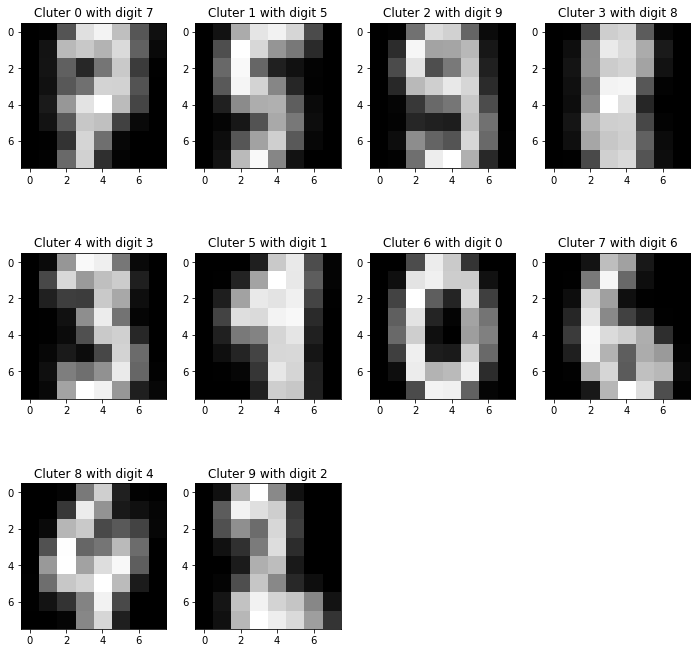

In [26]:
# Задача 1

import numpy as np
from scipy.cluster.vq import kmeans
from operator import itemgetter
from sklearn.preprocessing import scale

def lab(pts, centroids):
    a = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    return np.argmin(a, axis=1)

def fun(k):
    centroids, dist = kmeans(a, k)
    labels = lab(a, centroids)
    cluster_to_digit = []
    for i in range(k):
        cluster_to_digit.append(np.argmax(np.bincount(digits.target[labels == i])))
    b = np.array(list(map(cluster_to_digit.__getitem__, labels)))
    return b, centroids, cluster_to_digit

a = digits.images.reshape((digits.images.shape[0], -1))
b, centroids, cluster_to_digit = fun(10)
plt.figure(figsize=(12,12))
for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.title('Cluter {} with digit {}'.format(i, cluster_to_digit[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')

In [42]:
# Задача 2

def err(y_true, y_pred):
    return np.count_nonzero(y_true != y_pred)/y_true.size

for n in range(10):
    m = (digits.target == n) # маска
    print(n, 'error =', err(digits.target[m], y_pred[m]))
print('Total:')
print(err(digits.target, y_pred))

0 error = 0.011235955056179775
1 error = 0.16483516483516483
2 error = 0.096045197740113
3 error = 0.18032786885245902
4 error = 0.12154696132596685
5 error = 0.06043956043956044
6 error = 0.011049723756906077
7 error = 0.0111731843575419
8 error = 0.10344827586206896
9 error = 0.2222222222222222
Total:
0.09849749582637729


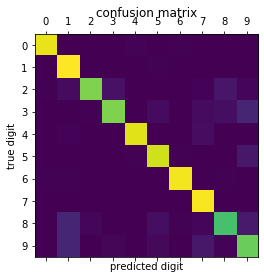

In [71]:
# Задача 3  

def matrix(y_true, y_pred):
    num_types = max(y_true.max(), y_pred.max()) + 1
    conf_matr =  np.array([[np.count_nonzero((y_true == i) & (y_pred == j)) for j in range(num_types)] \
                            for i in range(num_types)])
    plt.matshow(conf_matr)
    plt.xticks(range(num_types))
    plt.yticks(range(num_types))
    plt.title('confusion matrix')
    plt.xlabel('predicted digit')
    plt.ylabel('true digit')
    plt.show()
    
matrix(digits.target, y_pred)

# Вывод: 0, 4, 6, 7 определяются лучше, чем 1, 5, 9.

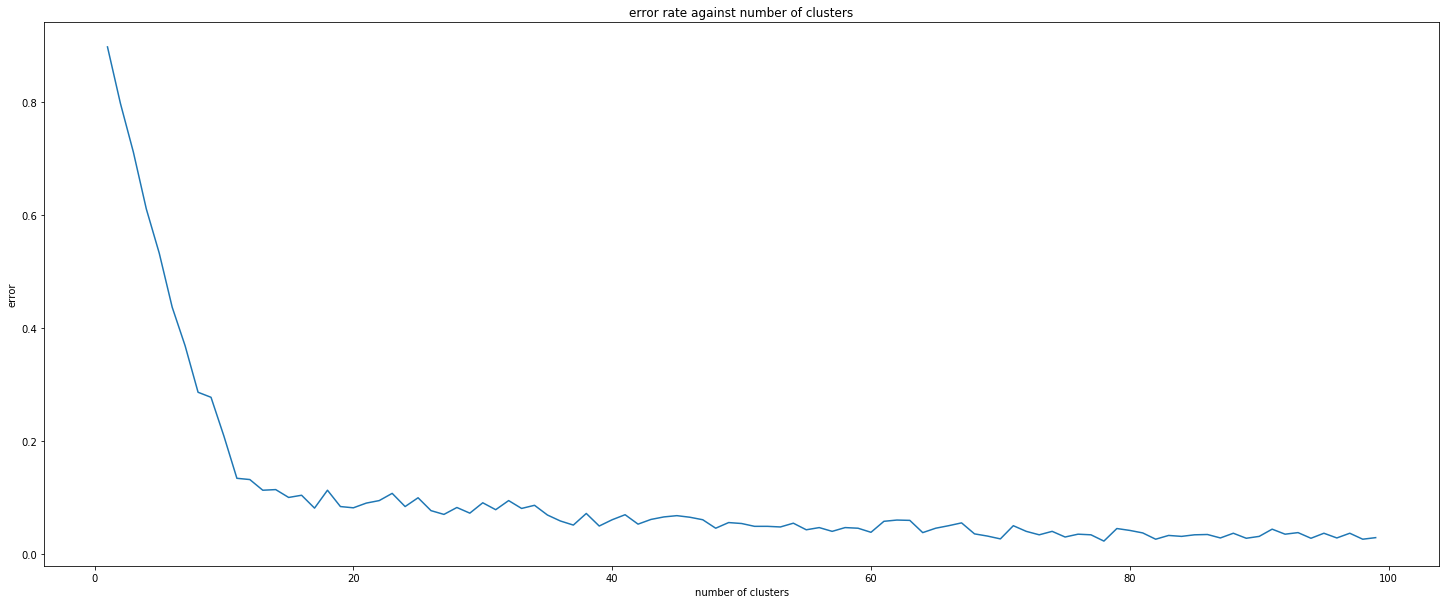

In [87]:
# Задача 4

x = range(1, 100)
y = [err(digits.target, fun(i)[0]) for i in x]
plt.figure(figsize=(25,10))
plt.title('error rate against number of clusters')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.plot(x,y)

#После ~x=20 ошибка мало изменяется. 

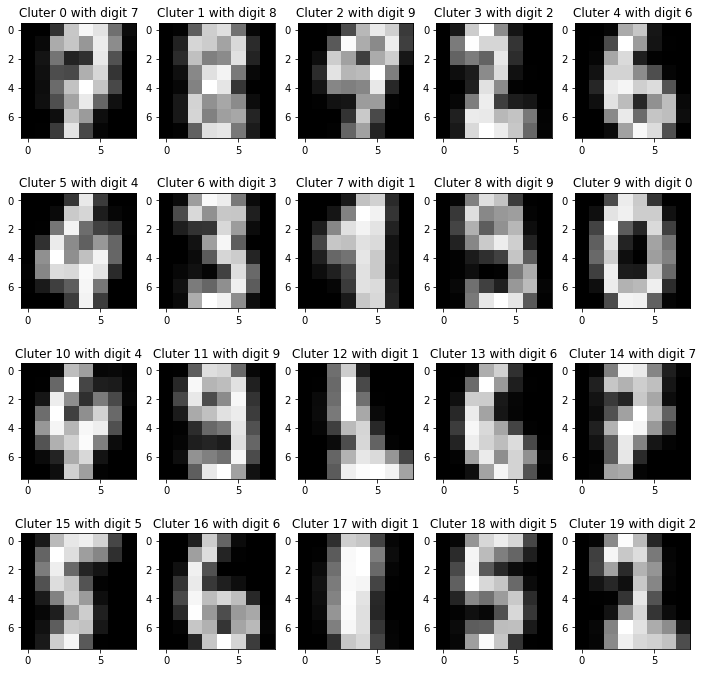

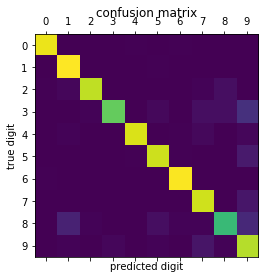

In [84]:
# Задача 5

y_pred, centroids, cluster_to_digit = fun(20)
plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.title('Cluter {} with digit {}'.format(i, cluster_to_digit[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='gray')    
matrix(digits.target, y_pred)

# У цифр 0,3,9 - по 1 кластеру, у 2,6,7,8 - по 2, у 1,4,5 - по 3.
# Чем больше кластеров берём, тем меньше ошибка и больше число кластеров у каждой цифры, 
# но и так их уже умеем определять.